# **1. Importing Necessary Libraries**


### Data Manipulation and Analysis
1. **`numpy`**:
   - Provides support for arrays and matrix operations.
   - Enables fast numerical computations.

2. **`pandas`**:
   - Used for data manipulation and analysis.
   - Provides DataFrame structures for handling tabular data (rows and columns).

### Data Visualization
3. **`matplotlib.pyplot`**:
   - Used for creating static, interactive, and animated visualizations.
   - Enables line plots, scatter plots, histograms, and more.

4. **`seaborn`**:
   - Built on top of Matplotlib, provides a high-level interface for drawing attractive statistical graphics.
   - Ideal for heatmaps, pair plots, and violin plots.

### Machine Learning and Preprocessing
5. **`sklearn.model_selection.StratifiedKFold`**:
   - Used for creating stratified folds for cross-validation, ensuring class distribution is preserved across training and testing sets.

6. **`sklearn.model_selection.RandomizedSearchCV`**:
   - Facilitates hyperparameter tuning by randomly sampling a subset of the parameter space.
   - More efficient for large search spaces.

7. **`sklearn.ensemble.RandomForestClassifier`**:
   - A robust, ensemble learning method for classification using decision trees.
   - Aggregates the predictions of multiple trees to improve accuracy and prevent overfitting.

8. **`sklearn.ensemble.IsolationForest`**:
   - An anomaly detection algorithm that isolates outliers by randomly partitioning data.
   - Useful for detecting anomalies in datasets.

9. **`sklearn.impute.SimpleImputer`**:
   - Handles missing data by replacing them with a specified strategy, such as the mean, median, or mode.

10. **`sklearn.preprocessing.OneHotEncoder`**:
    - Converts categorical data into a one-hot encoded format (binary columns).
    - Ensures compatibility with machine learning models.

11. **`sklearn.pipeline.Pipeline`**:
    - Helps automate machine learning workflows by sequentially applying preprocessing steps and the model.
    - Makes code modular and cleaner.

12. **`sklearn.compose.ColumnTransformer`**:
    - Applies different transformations to specific columns in a dataset.
    - Useful for handling mixed data types (e.g., numerical and categorical).

13. **`sklearn.metrics.f1_score`**:
    - Computes the F1 score, a harmonic mean of precision and recall.
    - Measures classification model performance, especially for imbalanced datasets.

14. **`sklearn.metrics.make_scorer`**:
    - Customizes scoring functions for model evaluation during cross-validation or hyperparameter tuning.

15. **`sklearn.utils.class_weight.compute_class_weight`**:
    - Calculates class weights to handle class imbalance during model training.

### Advanced Machine Learning Models
16. **`xgboost`**:
    - An efficient implementation of gradient-boosting decision trees.
    - Optimized for speed and performance, commonly used for structured/tabular data.

17. **`lightgbm`**:
    - Another gradient-boosting library focused on efficiency and scalability.
    - Works well with large datasets and supports categorical data natively.

18. **`lightgbm.early_stopping`**:
    - Stops model training early if the validation performance stops improving.
    - Reduces overfitting and training time.

### Utilities
19. **`warnings`**:
    - Manages warning messages durinvaluation, making them highly suitable for advanced machine learning pipelines.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, make_scorer
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
import lightgbm as lgb
from lightgbm import early_stopping
import warnings
warnings.filterwarnings("ignore")

# **2. Loading Data**

Reading and extracting data from the train and test csvs from their respective locations, the information is now stored in two separate dataframes

In [2]:
train = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')


# **3. Exploratory Data Analysis (EDA)**

# **3.1 Basic Information and Overview**

Displays the first five rows of the dataset, this gives us a preview of the data.

This is useful for:
* Understanding the structure of the dataset.
* Checking the data types of columns.
* Identifying any immediate data issues like missing values or inconsistencies.


In [3]:
train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


Displays:
* The number of rows and columns in the dataset.
* Column names and their data types (e.g., int64, float64, object).
* The number of non-null (non-missing) values in each column.T
* he memory usage of the DataFrame.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

Calculates summary statistics for all columns (both numerical and categorical) in the train DataFrame.

Numerical Columns:
* Count: Number of non-missing values.
* Mean: Average value.Std: Standard deviation.
* Min, 25%, 50%, 75%
* Max: Percentiles of the data.

Categorical Columns:
* Count: Number of non-missing values.
* Unique: Number of unique categories.
* Top: Most frequent category (mode).
* Freq: Frequency of the top category.


In [5]:
train.describe(include='all')

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
count,39211,39211.000000,38982,39211,37744,39211,39211.000000,39211,39211,28875,39211.000000,39211.000000,39211.000000,39211.000000,9760,39211
unique,1013,NaN,11,3,3,2,NaN,2,2,2,NaN,NaN,NaN,NaN,3,2
top,2009-05-15,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,NaN,NaN,NaN,failure,no
freq,313,NaN,7776,22691,19584,36954,NaN,21657,31820,25030,NaN,NaN,NaN,NaN,4949,33384
mean,NaN,42.120247,NaN,NaN,NaN,NaN,5441.781719,NaN,NaN,NaN,439.062789,5.108770,72.256051,11.826171,NaN,NaN
std,NaN,12.709352,NaN,NaN,NaN,NaN,16365.292065,NaN,NaN,NaN,769.096291,9.890153,160.942593,44.140259,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,98.000000,NaN,NaN,NaN,109.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,NaN,40.000000,NaN,NaN,NaN,NaN,549.000000,NaN,NaN,NaN,197.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,NaN,50.000000,NaN,NaN,NaN,NaN,2030.000000,NaN,NaN,NaN,380.000000,4.000000,-1.000000,0.000000,NaN,NaN


Counts distinct unique values in each column of the DataFrame.

In [6]:
train.nunique()

last contact date    1013
age                    78
job                    11
marital                 3
education               3
default                 2
balance              9535
housing                 2
loan                    2
contact                 2
duration             3146
campaign               63
pdays                 865
previous              276
poutcome                3
target                  2
dtype: int64

In [7]:
train.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

# **3.2 Data Visualization**

**Distribution of numerical features**

The output will be a grid of histograms, one for each numerical column in the DataFrame.
useful for checking if columns follow a normal, skewed, or uniform distribution

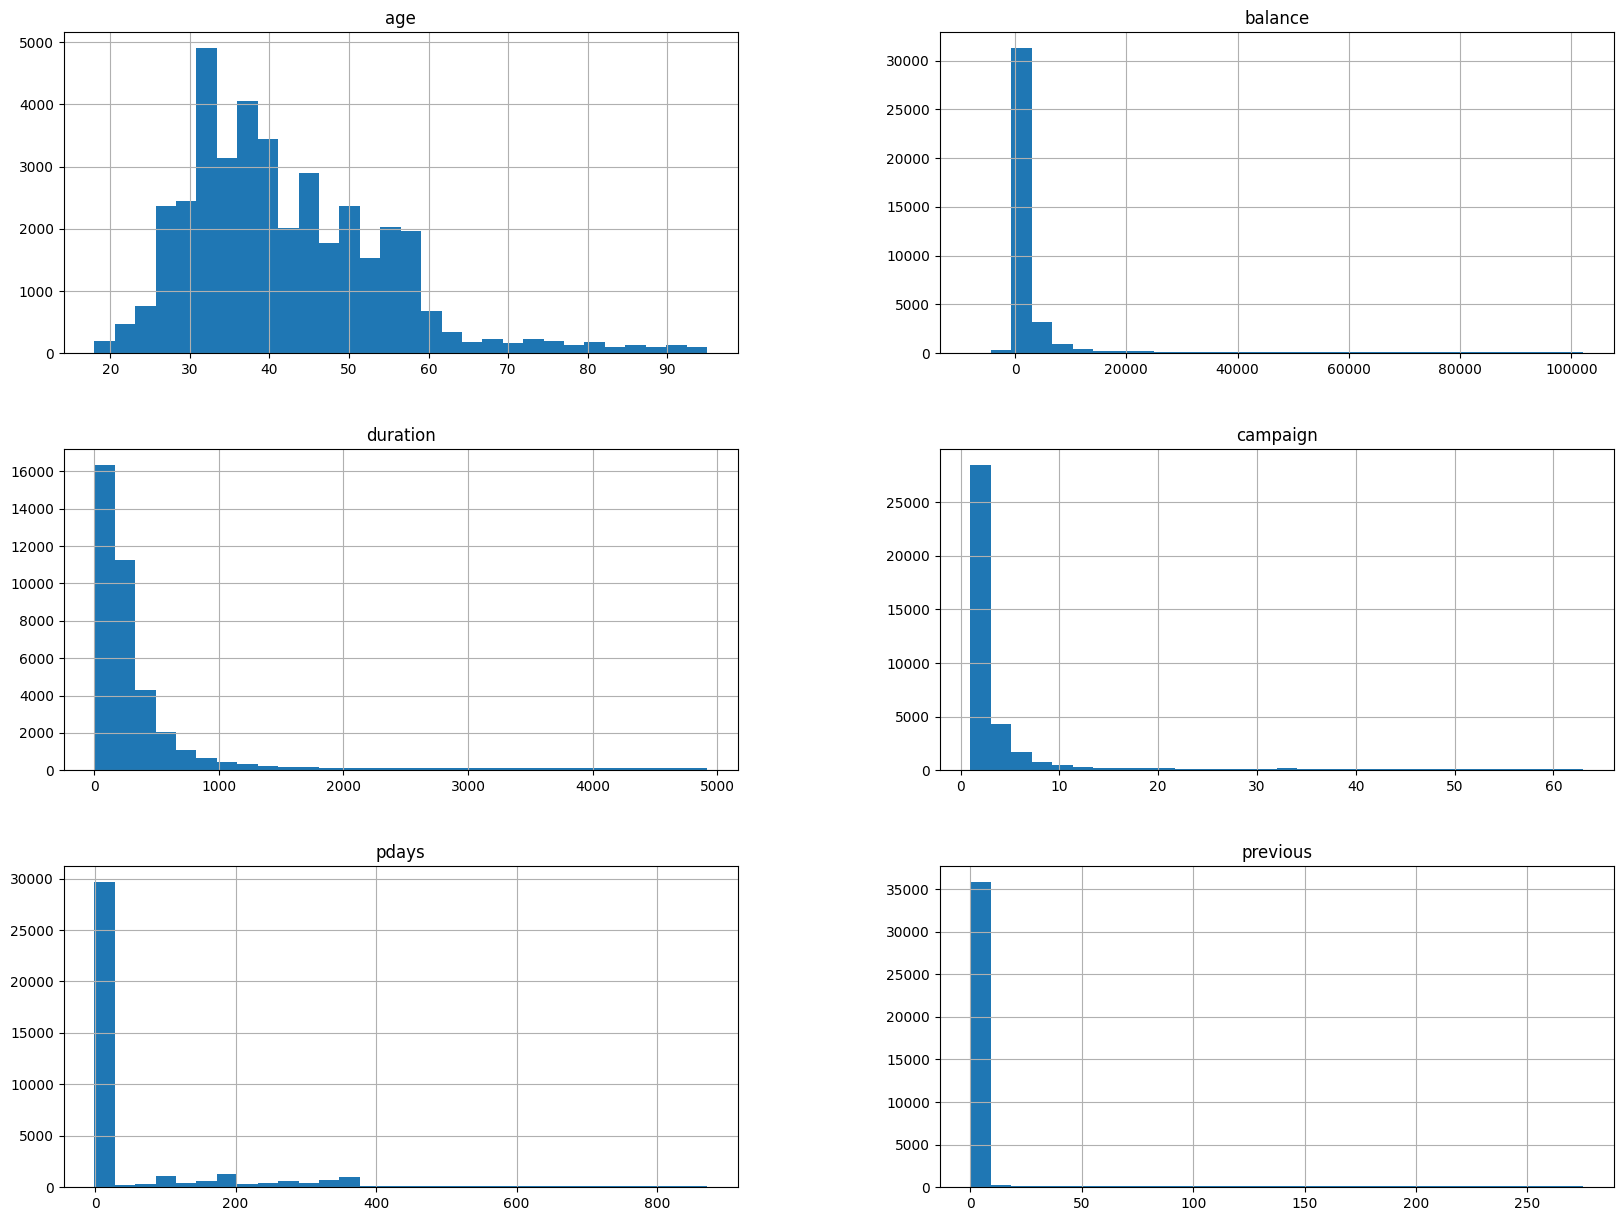

In [8]:
train.hist(bins=30, figsize=(20,15))
plt.show()

**Correlations between numerical features**

useful for finding correlation between numerical features

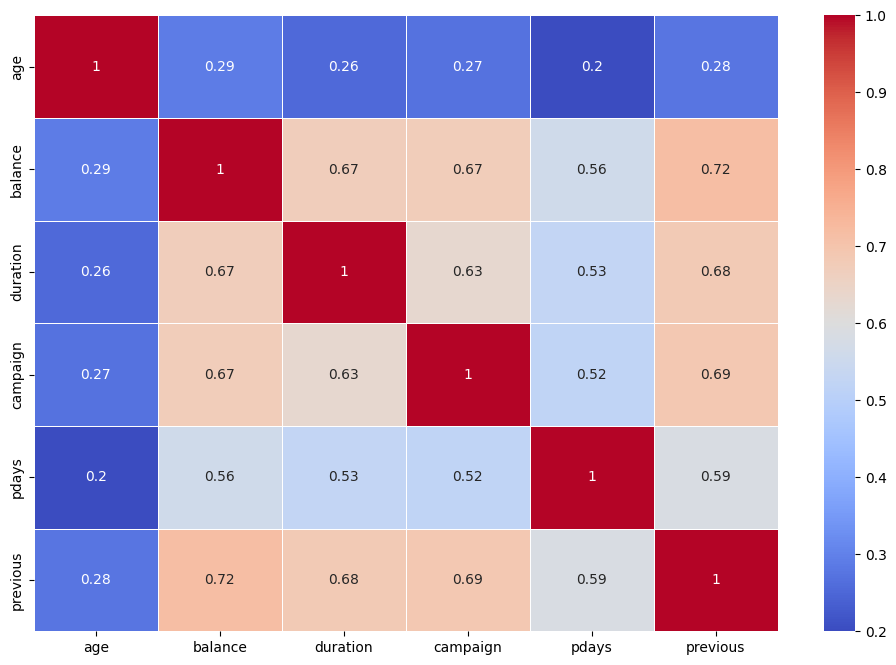

In [9]:
numeric_cols = train.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

**Distribution of categorical features**

Useful for checking the distribution of values of categorical columns

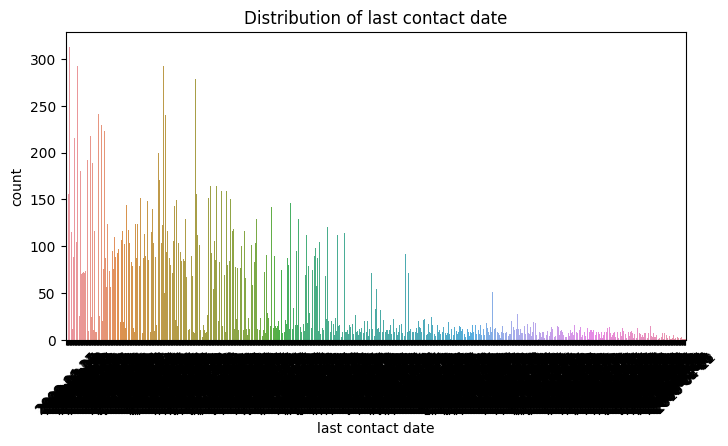

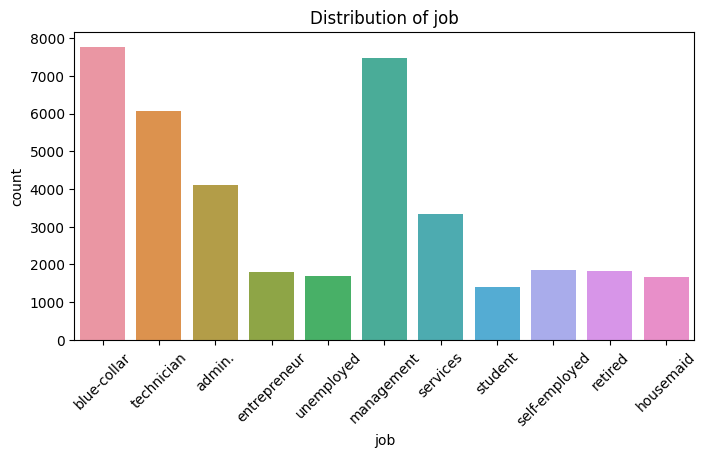

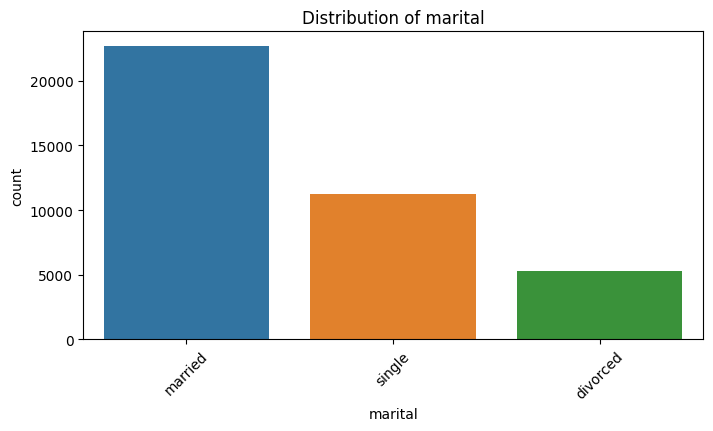

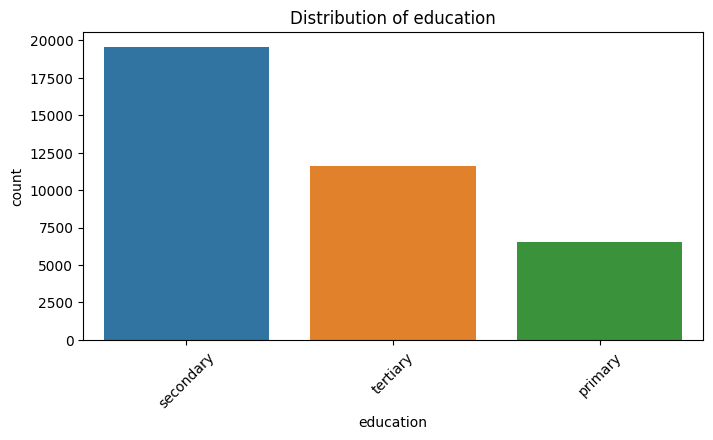

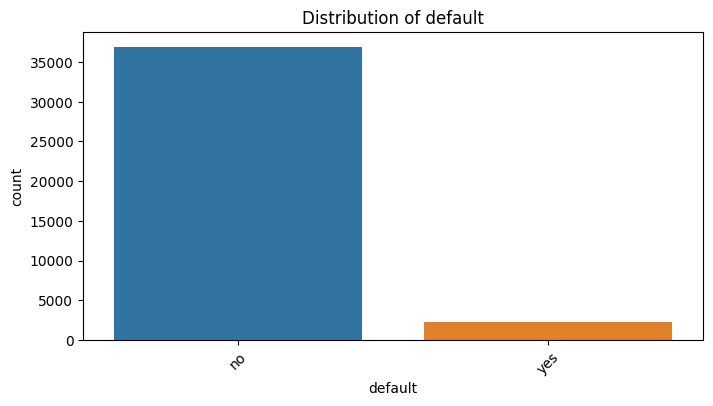

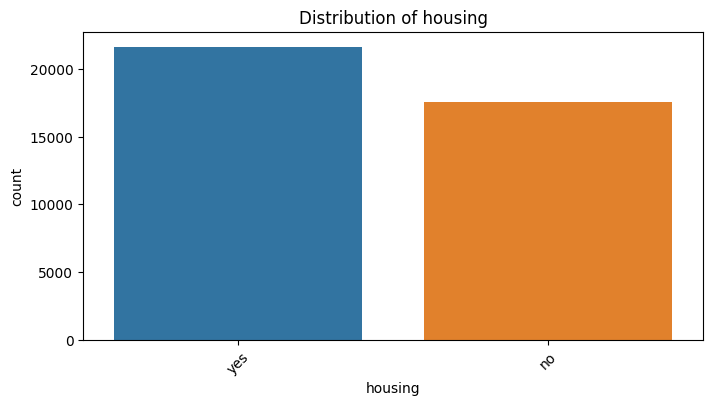

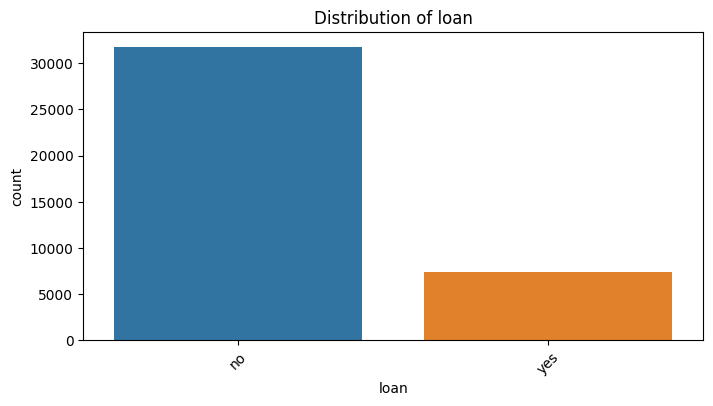

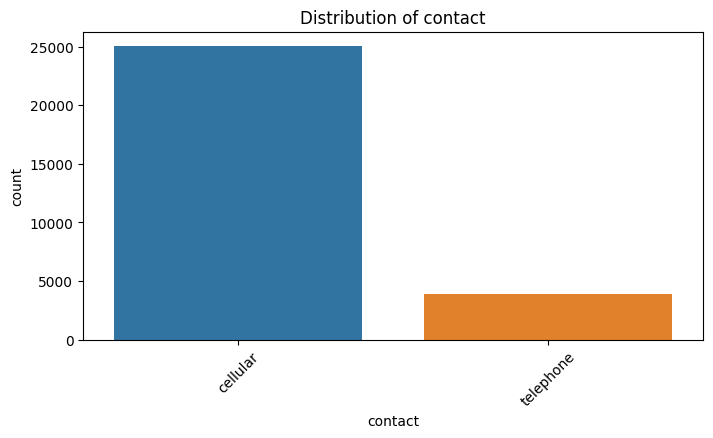

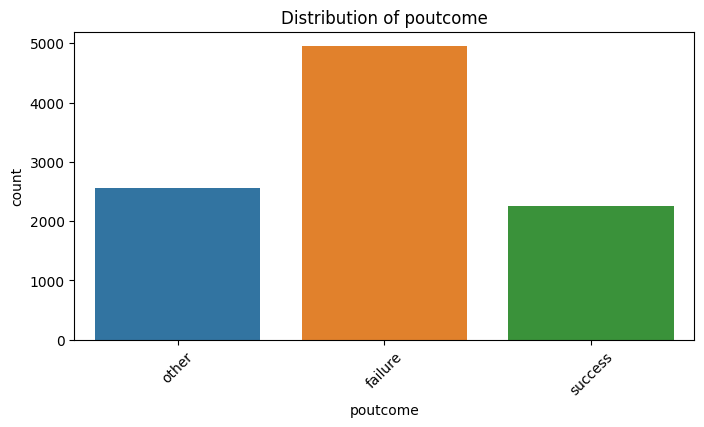

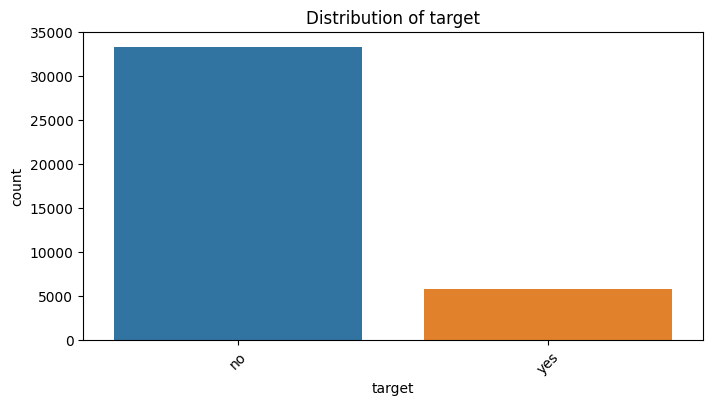

In [10]:
categorical_columns = train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=train)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

**outliers in numerical features**

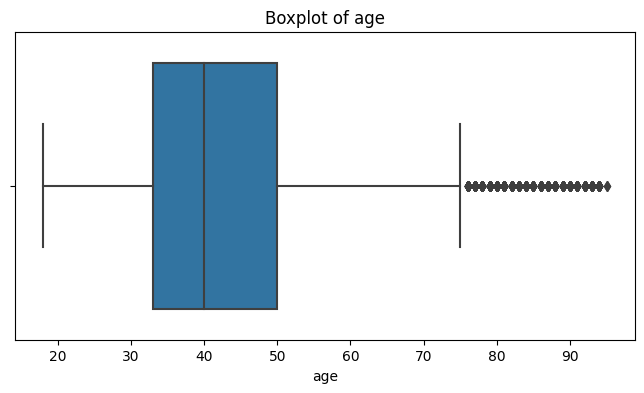

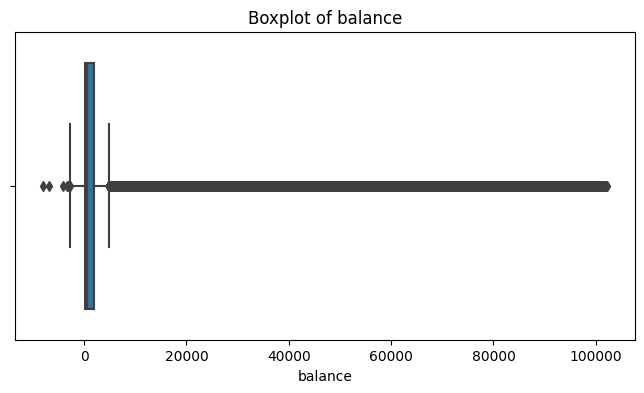

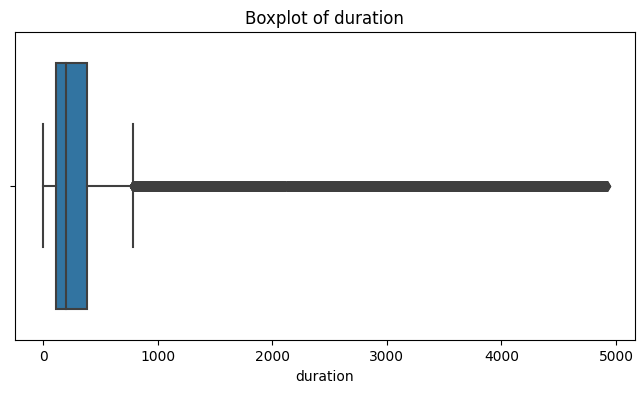

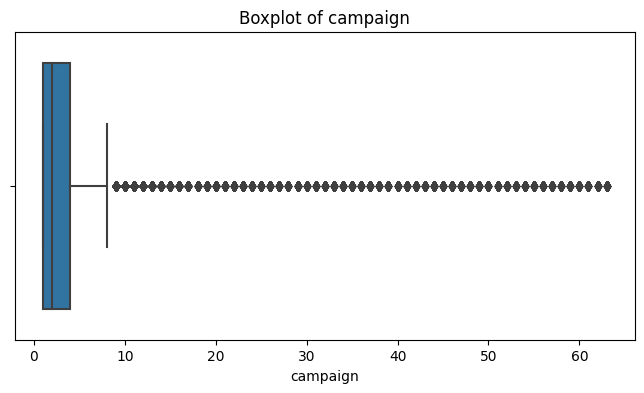

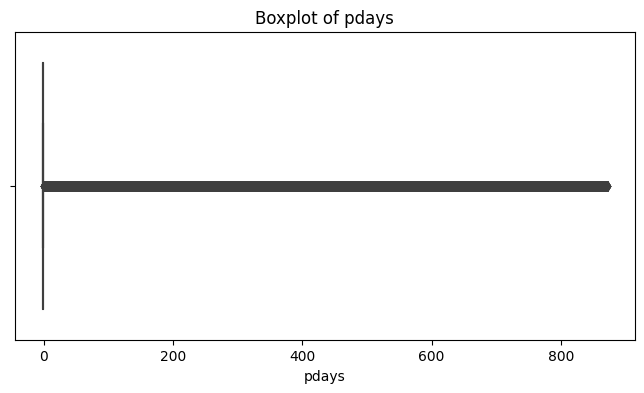

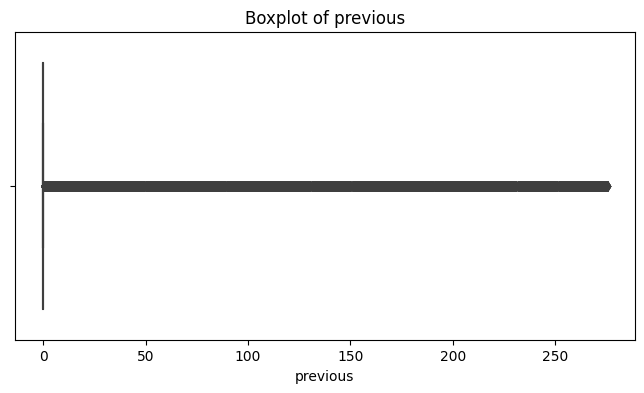

In [11]:
numerical_columns = train.select_dtypes(include=['number']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# **4. Feature Engineering**

* Target Transformation: Converts categorical target into binary numerical form for modeling.
* Date Conversion and Feature Engineering: Derives new features to capture more complex relationships between predictors and the target.
* Target Encoding: Numerically encodes categorical variables based on their correlation with the target.
* Column Dropping: Removes redundant columns to avoid multicollinearity and keep only relevant information for modeling.

In [12]:
train['target'] = train['target'].apply(lambda x: 1 if x == 'yes' else 0)
train['last contact date'] = pd.to_datetime(train['last contact date'])
test['last contact date'] = pd.to_datetime(test['last contact date'])


for df in [train, test]:
    df['contact_day'] = df['last contact date'].dt.day
    df['duration^2'] = df['duration'] ** 2
    df['balance^2'] = df['balance'] ** 2
    df['contact_day_balance'] = df['contact_day'] * df['balance']
    df['log_balance'] = np.log1p(np.where(df['balance'] <= 0, 1e-6, df['balance']))
    df['duration_per_campaign'] = df['duration'] / (df['campaign'] + 1)
    df['pdays_campaign'] = df['pdays'] * df['campaign']


target_encoding = train.groupby('job')['target'].mean()
train['job_target_enc'] = train['job'].map(target_encoding)


test['job_target_enc'] = test['job'].map(target_encoding)
test['job_target_enc'].fillna(train['target'].mean(), inplace=True)  


train.drop(columns=['last contact date', 'job'], inplace=True)
test.drop(columns=['last contact date', 'job'], inplace=True)


# **5. Data Preprocessing**

* Feature Identification:
Splits features into numerical and categorical subsets.
* Pipeline Creation:
Applies tailored preprocessing to each type of feature.
Handles missing values and encodes categorical variables.
* Preprocessing:
Transforms the data into a clean, numeric matrix ready for modeling.
* Outlier Detection:Filters out rows identified as outliers to improve model performance.

In [13]:
numerical_features = train.select_dtypes(include=['number']).columns.drop('target')
categorical_features = train.select_dtypes(include=['object']).columns

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median'))])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, train.select_dtypes(include=['number']).columns.drop('target')),
        ('cat', cat_pipeline, train.select_dtypes(include=['object']).columns)
    ])

X = train.drop(columns='target')
X = preprocessor.fit_transform(X)
y = np.array(train['target'])


isolation_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = isolation_forest.fit_predict(X)
X, y = X[outliers == 1], y[outliers == 1]

# **6. Model Training**

# **6.1 XGBoost Model**

In [14]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
scale_pos_weight = class_weights[1] / class_weights[0]

params_xgb = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': scale_pos_weight,
    'max_depth': 8,
    'learning_rate': 0.015,
    'reg_alpha': 0.2,
    'reg_lambda': 2.5,
    'min_child_weight': 5,
    'subsample': 0.85,
    'colsample_bytree': 0.85,
    'random_state': 42
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_f1_scores_xgb = []

for train_idx, val_idx in skf.split(X, y):
    X_train_cv, X_val_cv = X[train_idx], X[val_idx]
    y_train_cv, y_val_cv = y[train_idx], y[val_idx]

    dtrain_cv = xgb.DMatrix(X_train_cv, label=y_train_cv)
    dval_cv = xgb.DMatrix(X_val_cv, label=y_val_cv)

    model_cv = xgb.train(
        params_xgb,
        dtrain_cv,
        num_boost_round=1000,
        evals=[(dtrain_cv, 'train'), (dval_cv, 'eval')],
        early_stopping_rounds=50,
        verbose_eval=False
    )

    y_val_pred_cv = (model_cv.predict(dval_cv) > 0.5).astype(int)
    cv_f1_scores_xgb.append(f1_score(y_val_cv, y_val_pred_cv, average='macro'))

print(f"Mean Cross-Validated F1 Score for XGBoost: {np.mean(cv_f1_scores_xgb):.4f}")

Mean Cross-Validated F1 Score for XGBoost: 0.7471


# **6.2 Random Forest Model**

In [15]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

rf = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)

params_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}



random_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=params_rf,
    n_iter=10,
    scoring=make_scorer(f1_score, average='macro'),
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search_rf.fit(X, y)
best_rf = random_search_rf.best_estimator_

print(f"Best Random Forest Parameters: {random_search_rf.best_params_}")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_f1_scores = []

for train_idx, val_idx in skf.split(X, y):
    X_train_cv, X_val_cv = X[train_idx], X[val_idx]
    y_train_cv, y_val_cv = y[train_idx], y[val_idx]

    best_rf.fit(X_train_cv, y_train_cv)
    y_val_pred_cv = best_rf.predict(X_val_cv)
    cv_f1_scores.append(f1_score(y_val_cv, y_val_pred_cv, average='macro'))

print(f"Mean Cross-Validated F1 Score: {np.mean(cv_f1_scores):.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Mean Cross-Validated F1 Score: 0.7547


# **6.3 LightGBM Model**

In [16]:
params_lgb = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'max_depth': 10,
    'num_leaves': 50,
    'learning_rate': 0.05,
    'n_estimators': 400,
    'min_child_weight': 3,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    'random_state': 42
    }

cv_f1_scores_lgb = []

for train_idx, val_idx in skf.split(X, y):
    X_train_cv, X_val_cv = X[train_idx], X[val_idx]
    y_train_cv, y_val_cv = y[train_idx], y[val_idx]

    model_lgb = lgb.LGBMClassifier(**params_lgb)
    model_lgb.fit(
        X_train_cv, y_train_cv,
        eval_set=[(X_val_cv, y_val_cv)],
        eval_metric='f1',
        callbacks=[early_stopping(stopping_rounds=50), lgb.log_evaluation(period=0)],
       
    )

    y_val_pred_cv = model_lgb.predict(X_val_cv)
    cv_f1_scores_lgb.append(f1_score(y_val_cv, y_val_pred_cv, average='macro'))

print(f"Mean Cross-Validated F1 Score for LightGBM: {np.mean(cv_f1_scores_lgb):.4f}")

[LightGBM] [Info] Number of positive: 4505, number of negative: 26550
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2733
[LightGBM] [Info] Number of data points in the train set: 31055, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145065 -> initscore=-1.773842
[LightGBM] [Info] Start training from score -1.773842
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

# **7. Model Comparison**

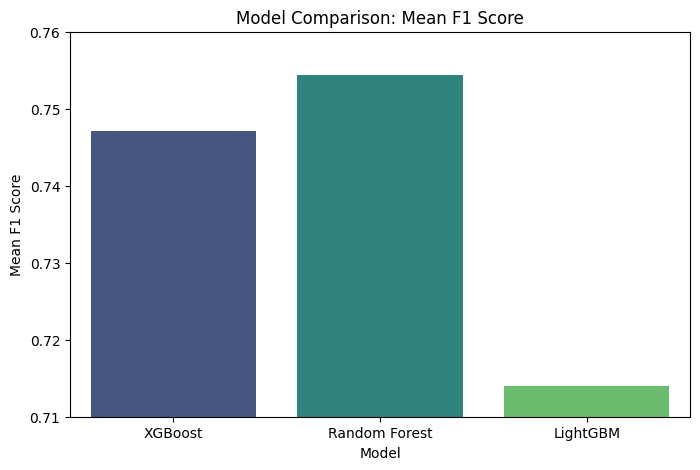

In [17]:
rf_f1_score = random_search_rf.best_score_
xgb_f1_score = np.mean(cv_f1_scores_xgb)
lgb_f1_score = np.mean(cv_f1_scores_lgb)

comparison_df = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'LightGBM'],
    'Mean F1 Score': [xgb_f1_score, rf_f1_score, lgb_f1_score]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x='Model', y='Mean F1 Score', palette='viridis')

plt.ylim(0.71, 0.76)

plt.title('Model Comparison: Mean F1 Score')
plt.ylabel('Mean F1 Score')
plt.show()

# **8. Submission**

In [18]:
X_test = preprocessor.transform(test)

dtest = xgb.DMatrix(X_test)
xgb_test_predictions = (model_cv.predict(dtest) > 0.5).astype(int)
rf_test_predictions = best_rf.predict(X_test)
lgb_test_predictions = model_lgb.predict(X_test)

submission_xgb = pd.DataFrame({'id': test.index, 'target': np.where(xgb_test_predictions == 1, 'yes', 'no')})
submission_rf = pd.DataFrame({'id': test.index, 'target': np.where(rf_test_predictions == 1, 'yes', 'no')})
submission_lgb = pd.DataFrame({'id': test.index, 'target': np.where(lgb_test_predictions == 1, 'yes', 'no')})

# submission_xgb.to_csv('submission_xgb.csv', index=False)
submission_rf.to_csv('submission.csv', index=False)
# submission_lgb.to_csv('submission_lgb.csv', index=False)

print("Submissions for XGBoost, Random Forest, and LightGBM saved!")

Submissions for XGBoost, Random Forest, and LightGBM saved!
